In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('E:/Datasets/Titanic/train.csv')
test=pd.read_csv('E:/Datasets/Titanic/test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.drop(['Cabin'], axis=1,inplace=True)

In [13]:
data.dropna(inplace=True)

In [17]:
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [21]:
survived_counts = data['Sex'].value_counts()
survived_counts

Sex
male      453
female    259
Name: count, dtype: int64

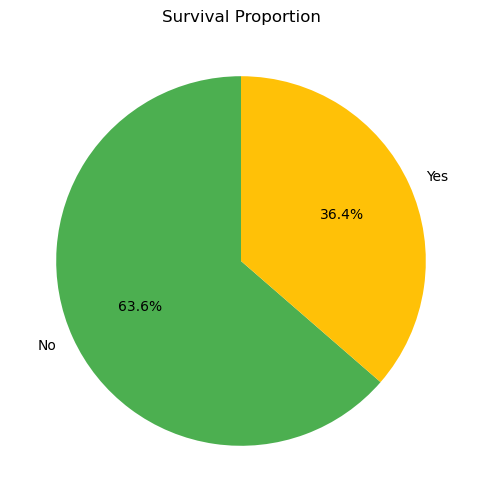

In [51]:
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'], startangle=90)
plt.title('Survival Proportion')
plt.show()

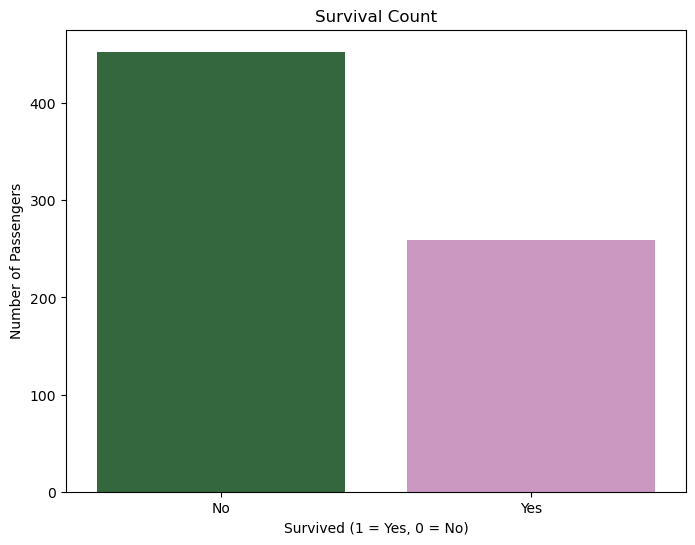

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='cubehelix', hue=survived_counts.index, legend=False)
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [31]:
data['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

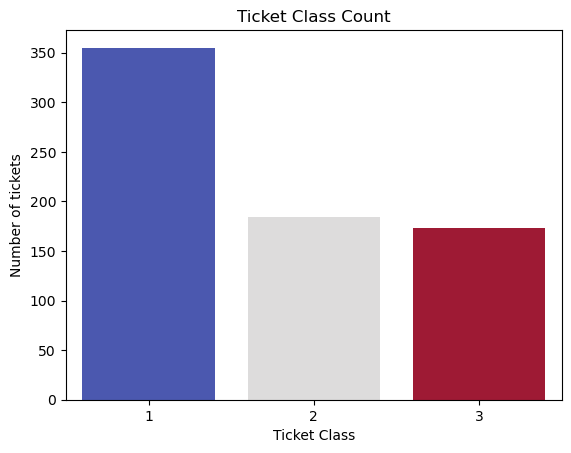

In [45]:
sns.barplot(x=[1, 2, 3], y=data['Pclass'].value_counts(), palette='coolwarm', hue=[1, 2, 3], legend=False)
plt.title("Ticket Class Count")
plt.ylabel('Number of tickets')
plt.xlabel('Ticket Class')
plt.show()

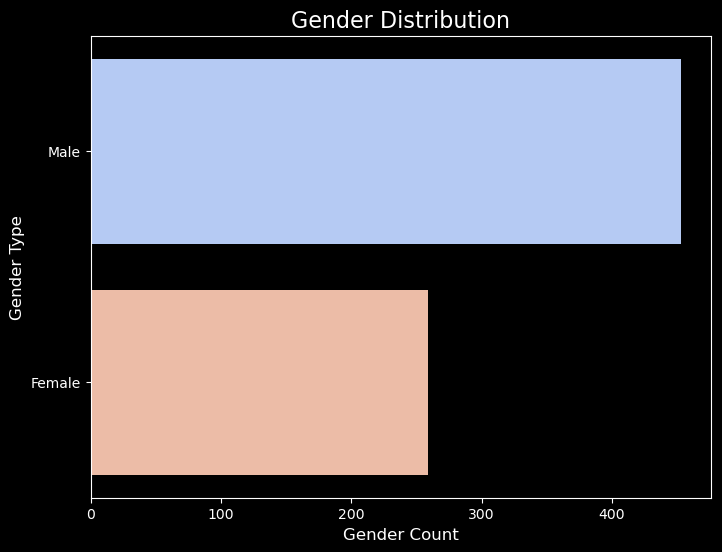

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data.Sex.value_counts(), y=['Male', 'Female'], palette='coolwarm', hue=['Male', 'Female'], legend=False)

for index, value in enumerate(data.Sex.value_counts()):
    plt.text(value, index, f' {value}', color='black', va="center")

plt.style.use('dark_background')
plt.title("Gender Distribution", fontsize=16, color='white')
plt.xlabel('Gender Count', fontsize=12, color='white')
plt.ylabel('Gender Type', fontsize=12, color='white')

plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

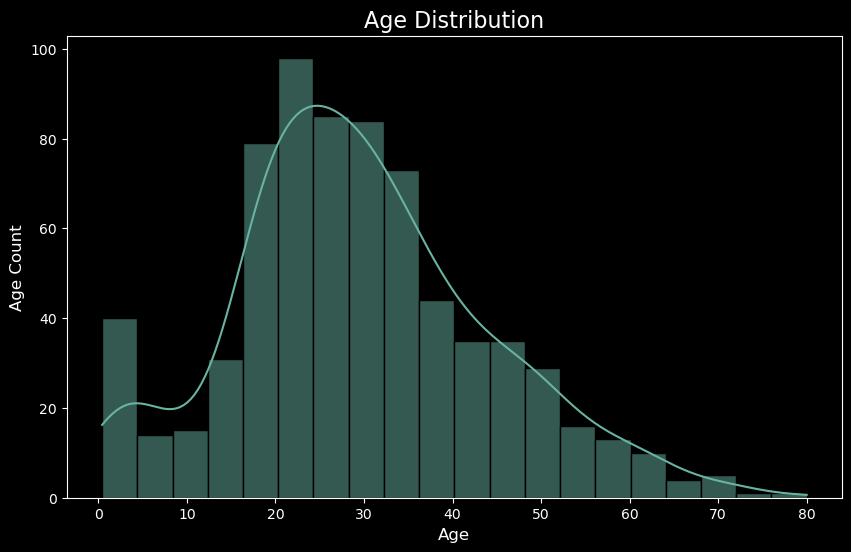

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='#69b3a2', edgecolor='black')
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel('Age Count', fontsize=12)
plt.show()

In [61]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [63]:
data[data['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()

C:\Users\bablo\AppData\Local\Temp\ipykernel_28032\904228379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()


AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

In [65]:
data.groupby(['AgeGroup','Sex'])['Survived'].value_counts()

C:\Users\bablo\AppData\Local\Temp\ipykernel_28032\581266073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['AgeGroup','Sex'])['Survived'].value_counts()


AgeGroup  Sex     Survived
0-18      female  1            38
                  0            17
          male    0            35
                  1            23
19-35     female  1            94
                  0            31
          male    0           200
                  1            41
36-50     female  1            44
                  0            14
          male    0            80
                  1            22
51-65     female  1            19
                  0             2
          male    0            35
                  1             6
66+       female  0             0
                  1             0
          male    0            10
                  1             1
Name: count, dtype: int64

## Pediction using logistic Regression

In [67]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [70]:
data.drop(['PassengerId','Ticket','Name','AgeGroup'],axis=1,inplace=True)

In [72]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [74]:
encoder= LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data['Embarked']=encoder.fit_transform(data['Embarked'])
data['Survived']=encoder.fit_transform(data['Survived'])
test['Sex'] = encoder.fit_transform(test['Sex'])

In [76]:
X=data.drop(columns=["Survived",'Fare','Embarked'])
y=data.Survived

In [78]:
X

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0
...,...,...,...,...,...
885,3,0,39.0,0,5
886,2,1,27.0,0,0
887,1,0,19.0,0,0
889,1,1,26.0,0,0


In [80]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train = data[["Pclass", "Sex", "SibSp", "Parch"]]
X_valid=data[["Pclass", "Sex", "SibSp", "Parch"]]
y_train = data['Survived']
y_valid=data['Survived']

In [86]:
X_test = test[["Pclass", "Sex", "SibSp", "Parch"]]

In [88]:
model=LogisticRegression(max_iter=12000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [92]:
y_pred=model.predict(X_valid)

In [98]:
rate=accuracy_score(y_valid,y_pred)*100
print(f'{int(rate)}%')

78%


In [100]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       424
           1       0.78      0.67      0.72       288

    accuracy                           0.79       712
   macro avg       0.79      0.77      0.77       712
weighted avg       0.79      0.79      0.78       712



In [102]:
print(confusion_matrix(y_valid,y_pred))

[[369  55]
 [ 96 192]]


In [104]:
y_pred=model.predict(X_test)

In [106]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [108]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
